In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -U ultralytics opencv-python matplotlib numpy tqdm


In [ ]:
%%writefile /content/Dataset1.yaml
path: /content/drive/My Drive/Colab Notebooks/Thesis_Dataset/Dataset1

train: train/images
val: valid/images
test: test/images

nc: 6
names:
  - propeller
  - pipe_type2
  - red_fin
  - net
  - qr_codes
  - pipe


Overwriting /content/Dataset1.yaml


In [ ]:
from ultralytics import YOLO
import torch

device = 0 if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# RT-DETR model (transformer-based, no NMS, no anchors)
model = YOLO("rtdetr-l.pt")

model.train(
    data="/content/Dataset1.yaml",
    epochs=20,
    imgsz=640,
    batch=16,
    device=device
)


Using device: 0
Ultralytics 8.4.6 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Dataset1.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=rtdetr-l.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, pl

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       1/20      12.3G      1.117      19.67     0.8033         15        640: 100% ━━━━━━━━━━━━ 159/159 6.9s/it 18:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 1.3s/it 12.7s
                   all        317        453     0.0419     0.0967     0.0187     0.0129

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       2/20      12.7G      0.531      4.715      0.292         14        640: 100% ━━━━━━━━━━━━ 159/159 1.3s/it 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 1.4it/s 6.9s
                   all        317        453      0.393      0.264      0.174      0.133

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       3/20      12.7G     0.3961       1.51     0.1993          9        640: 100% ━━━━━━━━━━━━ 159/159 1.2s/it 3:17
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 1.5it/s 6.8s
                   all        317        453      0.546      0.575      0.501      0.374

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       4/20      12.6G     0.3489     0.8987     0.1668         22        640: 100% ━━━━━━━━━━━━ 159/159 1.2s/it 3:15
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 1.4it/s 7.0s
                   all        317        453      0.828      0.681      0.726      0.557

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       5/20      12.5G     0.3194     0.6099     0.1555         12        640: 100% ━━━━━━━━━━━━ 159/159 1.2s/it 3:14
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 1.4it/s 7.0s
                   all        317        453      0.869      0.867      0.887      0.689

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       6/20      12.7G     0.3063     0.4959     0.1429          9        640: 100% ━━━━━━━━━━━━ 159/159 1.2s/it 3:13
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 1.5it/s 6.7s
                   all        317        453      0.935      0.895      0.931      0.702

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       7/20      12.7G     0.2971     0.4296     0.1387         16        640: 100% ━━━━━━━━━━━━ 159/159 1.2s/it 3:14
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 1.5it/s 6.9s
                   all        317        453      0.927      0.932      0.959      0.738

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       8/20      12.7G     0.2898     0.3923     0.1344         12        640: 100% ━━━━━━━━━━━━ 159/159 1.2s/it 3:14
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 1.7it/s 6.0s
                   all        317        453      0.918       0.94      0.958      0.746

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       9/20      12.8G     0.2818     0.3816     0.1303         13        640: 100% ━━━━━━━━━━━━ 159/159 1.2s/it 3:12
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 1.6it/s 6.2s
                   all        317        453       0.95      0.915      0.962      0.751

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      10/20      12.4G       0.28      0.372     0.1279         10        640: 100% ━━━━━━━━━━━━ 159/159 1.2s/it 3:14
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 1.6it/s 6.2s
                   all        317        453      0.939      0.932      0.955      0.753
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      11/20      12.8G     0.2268     0.3265     0.1144          8        640: 100% ━━━━━━━━━━━━ 159/159 1.2s/it 3:16
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 1.4it/s 7.0s
                   all        317        453      0.953      0.928      0.962      0.749

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      12/20      12.7G     0.2215     0.3177     0.1111         11        640: 100% ━━━━━━━━━━━━ 159/159 1.2s/it 3:13
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 1.5it/s 6.5s
                   all        317        453       0.95      0.931       0.96       0.76

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      13/20      12.8G     0.2135     0.3062     0.1061          5        640: 100% ━━━━━━━━━━━━ 159/159 1.2s/it 3:14
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 1.4it/s 7.0s
                   all        317        453      0.945      0.948      0.967      0.764

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      14/20      12.7G     0.2105     0.3015      0.103          9        640: 100% ━━━━━━━━━━━━ 159/159 1.2s/it 3:14
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 1.6it/s 6.4s
                   all        317        453      0.945      0.952      0.972      0.771

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      15/20      12.8G     0.2089     0.2984     0.1032         11        640: 100% ━━━━━━━━━━━━ 159/159 1.2s/it 3:14
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 1.6it/s 6.1s
                   all        317        453      0.951      0.946      0.969      0.768

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      16/20      12.7G      0.205     0.2937     0.1016          8        640: 100% ━━━━━━━━━━━━ 159/159 1.2s/it 3:13
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 1.7it/s 6.0s
                   all        317        453      0.957      0.952      0.974      0.772

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      17/20      12.4G     0.1995     0.2902     0.1008          6        640: 100% ━━━━━━━━━━━━ 159/159 1.2s/it 3:13
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 1.6it/s 6.4s
                   all        317        453      0.958      0.952      0.974      0.778

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      18/20      12.7G     0.1992      0.286    0.09986          8        640: 100% ━━━━━━━━━━━━ 159/159 1.2s/it 3:14
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 1.6it/s 6.1s
                   all        317        453      0.946      0.946      0.968      0.769

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      19/20      12.8G      0.196     0.2844    0.09686          8        640: 100% ━━━━━━━━━━━━ 159/159 1.2s/it 3:12
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 1.5it/s 6.7s
                   all        317        453       0.95      0.961      0.976      0.772

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


      20/20      12.7G     0.1921     0.2865    0.09328          9        640: 100% ━━━━━━━━━━━━ 159/159 1.2s/it 3:12
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 1.6it/s 6.2s
                   all        317        453      0.956      0.946       0.97      0.778

20 epochs completed in 1.394 hours.
Optimizer stripped from /content/runs/detect/train2/weights/last.pt, 66.2MB
Optimizer stripped from /content/runs/detect/train2/weights/best.pt, 66.2MB

Validating /content/runs/detect/train2/weights/best.pt...
Ultralytics 8.4.6 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
rt-detr-l summary: 310 layers, 31,996,070 parameters, 0 gradients, 103.5 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 1.2it/s 8.2s
                   all        317        453      0.955      0.946       0.97      0.779
             propeller         48        

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e938662a150>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [ ]:
metrics = model.val(
    data="/content/Dataset1.yaml",
    split="test"
)

print("RT-DETR mAP@0.5 (%):", metrics.box.map50 * 100)
print("RT-DETR Precision (%):", metrics.box.mp * 100)
print("RT-DETR Recall (%):", metrics.box.mr * 100)


Ultralytics 8.4.6 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
rt-detr-l summary: 310 layers, 31,996,070 parameters, 0 gradients, 103.5 GFLOPs
val: Fast image access ✅ (ping: 6.8±8.5 ms, read: 0.4±0.2 MB/s, size: 212.8 KB)
val: Scanning /content/drive/My Drive/Colab Notebooks/Thesis_Dataset/Dataset1/test/labels.cache... 318 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 318/318 88.9Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 20/20 1.4it/s 14.6s
                   all        318        435      0.954      0.968      0.979      0.794
             propeller         50         50      0.956          1      0.994      0.832
            pipe_type2         43         43      0.952      0.977       0.98      0.713
               red_fin         37         37      0.973      0.957      0.991      0.828
                   net         43         61      0.955      0.951      0.953      0.846
        


0: 640x640 1 propeller, 1 pipe_type2, 1 pipe, 58.6ms
Speed: 3.8ms preprocess, 58.6ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


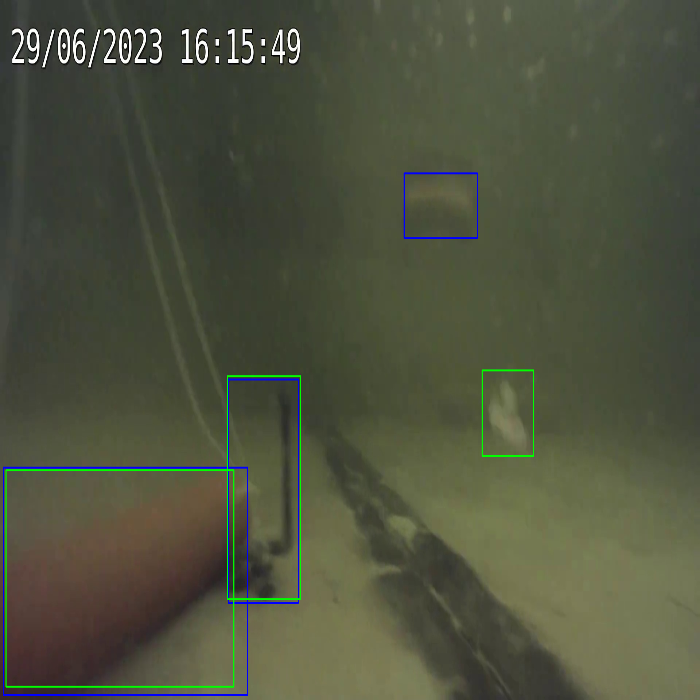


0: 640x640 1 qr_codes, 59.7ms
Speed: 4.5ms preprocess, 59.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


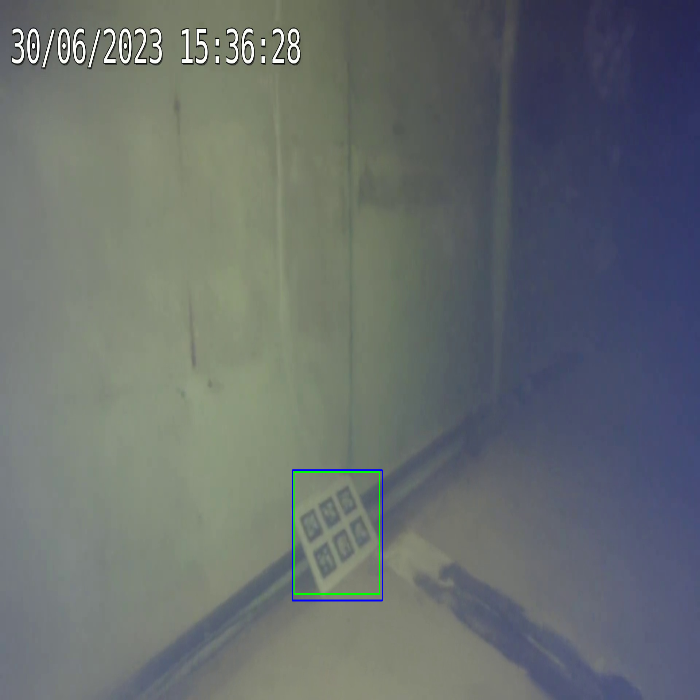


0: 640x640 1 qr_codes, 58.9ms
Speed: 4.7ms preprocess, 58.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


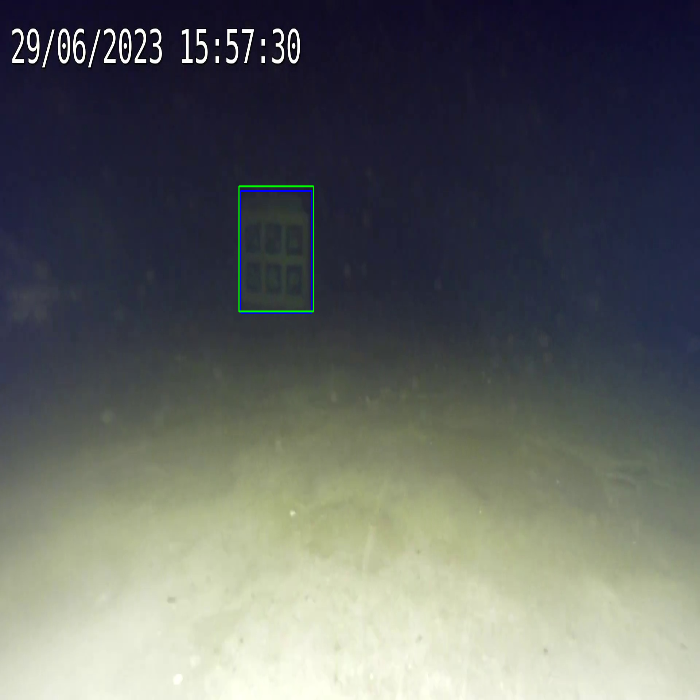


0: 640x640 1 qr_codes, 58.9ms
Speed: 4.7ms preprocess, 58.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


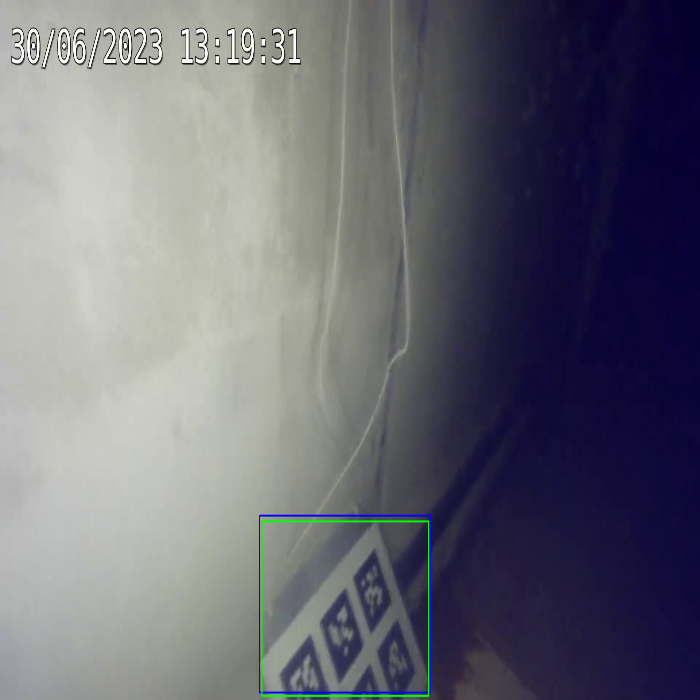


0: 640x640 1 pipe, 58.9ms
Speed: 4.2ms preprocess, 58.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


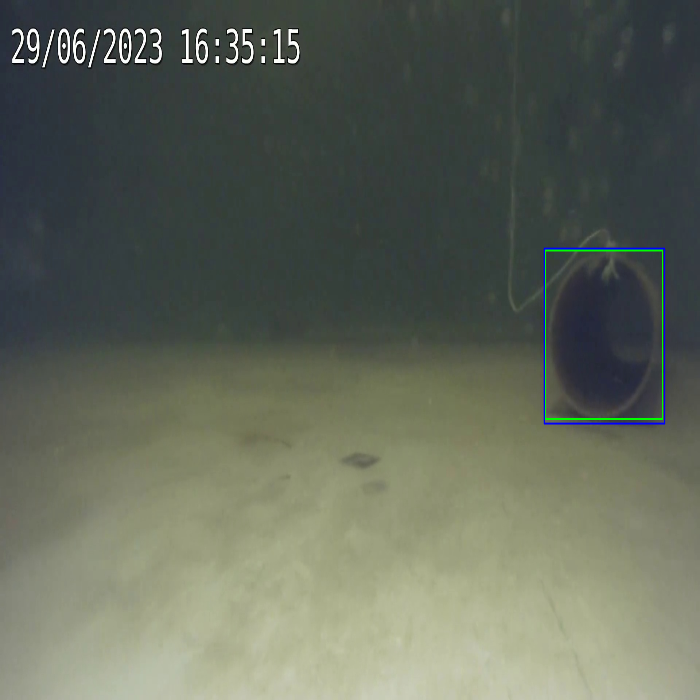


0: 640x640 (no detections), 60.3ms
Speed: 5.2ms preprocess, 60.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


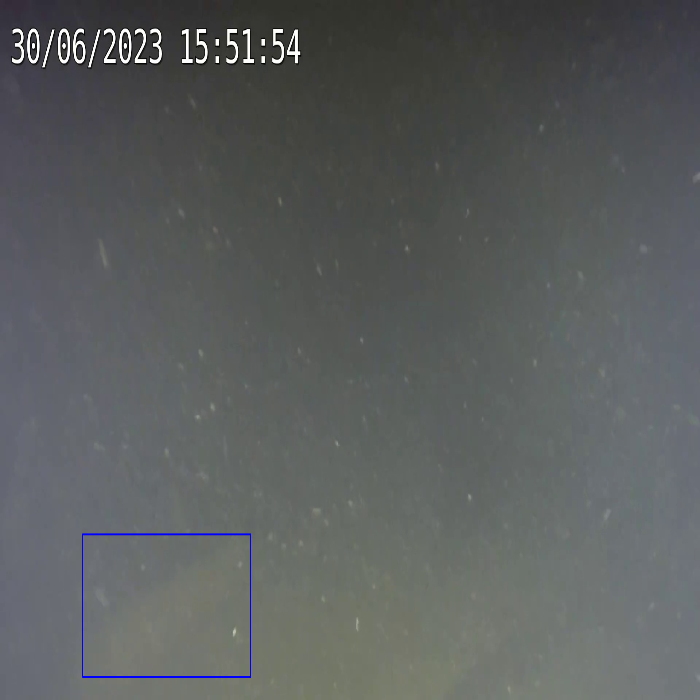


0: 640x640 1 pipe_type2, 1 qr_codes, 67.8ms
Speed: 5.1ms preprocess, 67.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


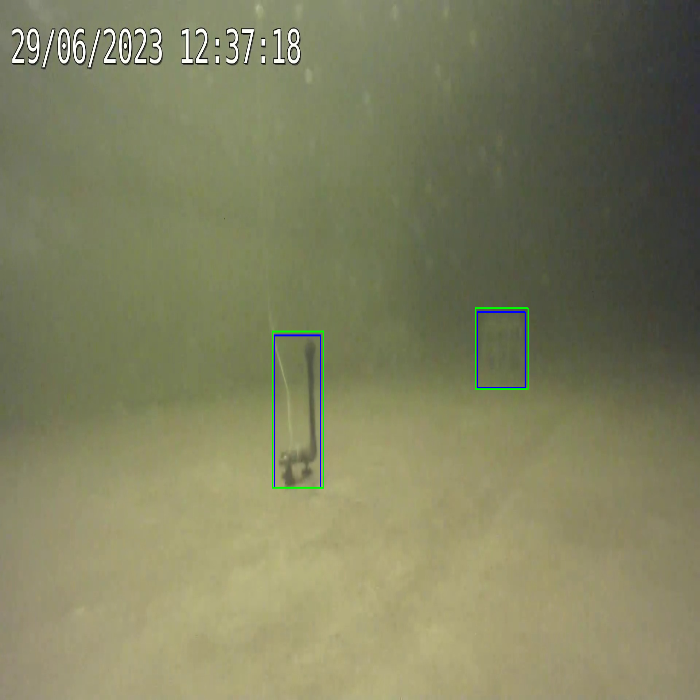


0: 640x640 2 qr_codess, 63.3ms
Speed: 5.9ms preprocess, 63.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


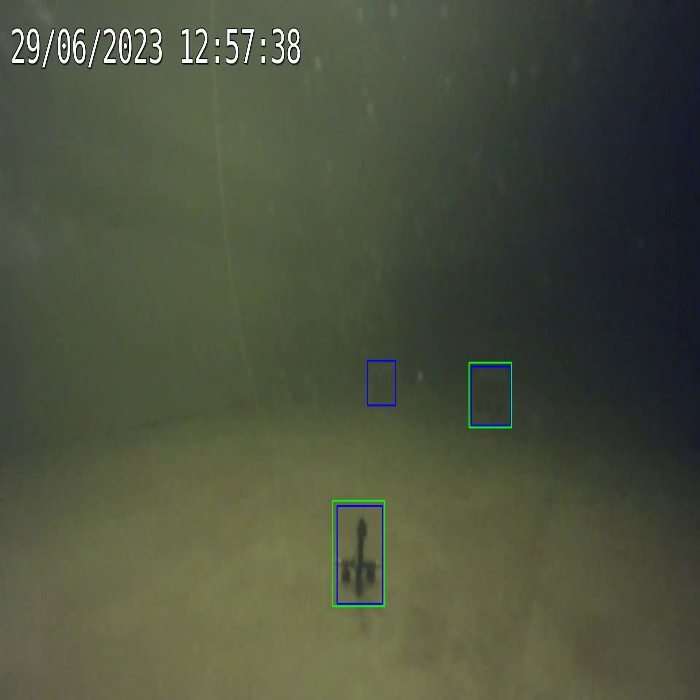


0: 640x640 1 qr_codes, 2 pipes, 60.6ms
Speed: 5.4ms preprocess, 60.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


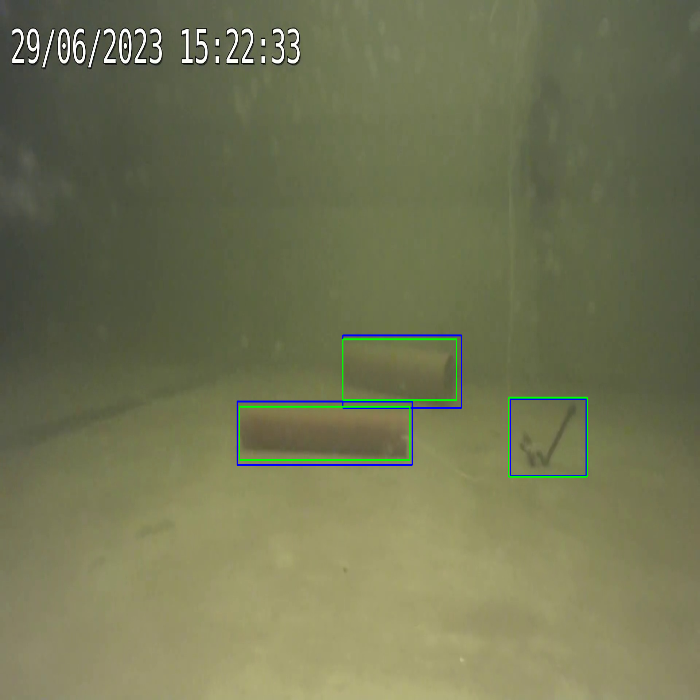


0: 640x640 3 qr_codess, 71.6ms
Speed: 6.3ms preprocess, 71.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


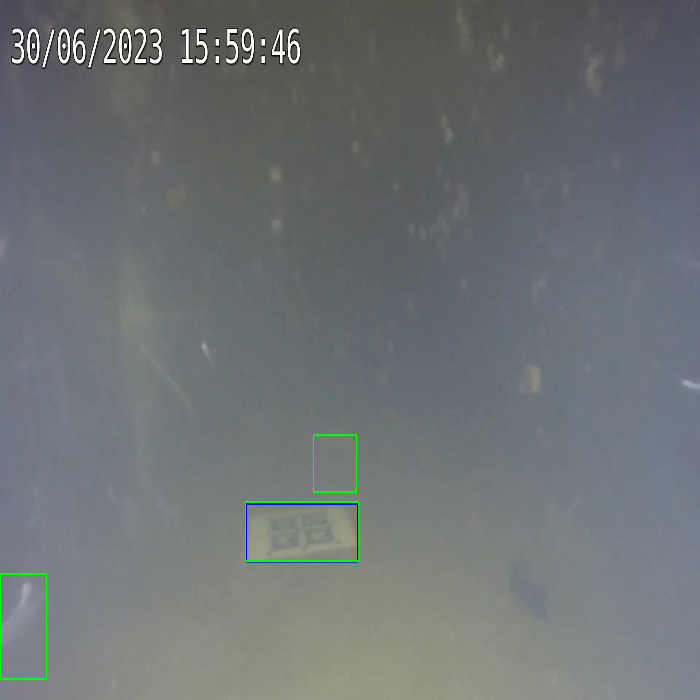

In [ ]:
import cv2, glob
from google.colab.patches import cv2_imshow

def read_yolo_labels(txt_file):
    labels=[]
    with open(txt_file) as f:
        for line in f:
            c,x,y,w,h = line.split()
            labels.append([int(c),float(x),float(y),float(w),float(h)])
    return labels

test_images = glob.glob(
    "/content/drive/My Drive/Colab Notebooks/Thesis_Dataset/Dataset1/test/images/*.jpg"
)

for img_path in test_images[:10]:
    img = cv2.imread(img_path)
    H,W,_ = img.shape

    # Ground truth (BLUE)
    label_path = img_path.replace("images","labels").replace(".jpg",".txt")
    gts = read_yolo_labels(label_path)
    for c,x,y,w,h in gts:
        x1=int((x-w/2)*W); y1=int((y-h/2)*H)
        x2=int((x+w/2)*W); y2=int((y+h/2)*H)
        cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0),2)

    # Predictions (GREEN)
    results = model(img)[0]
    for box in results.boxes.xyxy.cpu().numpy().astype(int):
        x1,y1,x2,y2 = box
        cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)

    cv2_imshow(cv2.resize(img,(700,700)))


In [ ]:
from tqdm import tqdm

def IoU(a, b):
    xA = max(a[0], b[0])
    yA = max(a[1], b[1])
    xB = min(a[2], b[2])
    yB = min(a[3], b[3])
    inter = max(0, xB - xA) * max(0, yB - yA)
    areaA = (a[2] - a[0]) * (a[3] - a[1])
    areaB = (b[2] - b[0]) * (b[3] - b[1])
    return inter / (areaA + areaB - inter + 1e-6)

correct, total = 0, 0

for img_path in tqdm(test_images):
    img = cv2.imread(img_path)
    H, W, _ = img.shape

    gt_boxes = []
    with open(img_path.replace("images", "labels").replace(".jpg", ".txt")) as f:
        for line in f:
            c, x, y, w, h = map(float, line.split())
            gt_boxes.append([
                int((x - w/2) * W),
                int((y - h/2) * H),
                int((x + w/2) * W),
                int((y + h/2) * H),
                int(c)
            ])

    preds = model(img)[0]
    for box, cls in zip(preds.boxes.xyxy, preds.boxes.cls):
        total += 1
        p = [*box.int().tolist(), int(cls)]
        for g in gt_boxes:
            if p[4] == g[4] and IoU(p[:4], g[:4]) >= 0.5:
                correct += 1
                break




  0%|          | 0/318 [00:00<?, ?it/s]


0: 640x640 1 propeller, 1 pipe_type2, 2 pipes, 60.8ms
Speed: 4.7ms preprocess, 60.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 qr_codes, 58.6ms
Speed: 3.9ms preprocess, 58.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 2/318 [00:00<00:27, 11.49it/s]


0: 640x640 1 qr_codes, 59.0ms
Speed: 3.5ms preprocess, 59.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 qr_codes, 39.8ms
Speed: 3.5ms preprocess, 39.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


  1%|▏         | 4/318 [00:00<00:25, 12.35it/s]


0: 640x640 1 pipe, 39.9ms
Speed: 4.1ms preprocess, 39.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 39.0ms
Speed: 3.7ms preprocess, 39.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 6/318 [00:00<00:22, 13.59it/s]


0: 640x640 1 pipe_type2, 1 qr_codes, 34.2ms
Speed: 3.9ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe_type2, 1 qr_codes, 34.8ms
Speed: 4.1ms preprocess, 34.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 8/318 [00:00<00:21, 14.65it/s]


0: 640x640 1 pipe_type2, 2 pipes, 34.5ms
Speed: 3.5ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 qr_codess, 35.2ms
Speed: 3.7ms preprocess, 35.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 10/318 [00:00<00:19, 15.41it/s]


0: 640x640 1 pipe, 34.0ms
Speed: 3.2ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 34.9ms
Speed: 4.7ms preprocess, 34.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 12/318 [00:00<00:19, 15.75it/s]


0: 640x640 3 pipes, 33.9ms
Speed: 3.3ms preprocess, 33.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 nets, 34.2ms
Speed: 3.9ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 14/318 [00:00<00:19, 15.99it/s]


0: 640x640 1 pipe, 34.4ms
Speed: 4.0ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 qr_codes, 34.3ms
Speed: 3.9ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 16/318 [00:01<00:18, 16.18it/s]


0: 640x640 1 propeller, 2 pipes, 33.9ms
Speed: 4.2ms preprocess, 33.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 34.1ms
Speed: 4.5ms preprocess, 34.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 18/318 [00:01<00:18, 16.45it/s]


0: 640x640 2 pipes, 37.5ms
Speed: 4.0ms preprocess, 37.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 propeller, 33.9ms
Speed: 3.9ms preprocess, 33.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


  6%|▋         | 20/318 [00:01<00:18, 16.11it/s]


0: 640x640 1 qr_codes, 34.2ms
Speed: 4.1ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 propeller, 1 pipe, 34.4ms
Speed: 3.7ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 22/318 [00:01<00:18, 16.22it/s]


0: 640x640 1 net, 1 qr_codes, 33.7ms
Speed: 3.8ms preprocess, 33.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 pipes, 34.5ms
Speed: 3.9ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 24/318 [00:01<00:18, 15.68it/s]


0: 640x640 1 qr_codes, 34.6ms
Speed: 3.9ms preprocess, 34.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 red_fin, 1 pipe, 33.9ms
Speed: 3.7ms preprocess, 33.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 26/318 [00:01<00:18, 16.00it/s]


0: 640x640 2 propellers, 1 pipe_type2, 1 pipe, 34.0ms
Speed: 3.1ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 nets, 35.0ms
Speed: 3.8ms preprocess, 35.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 28/318 [00:01<00:17, 16.15it/s]


0: 640x640 1 pipe, 34.0ms
Speed: 4.6ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 net, 33.8ms
Speed: 4.0ms preprocess, 33.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 30/318 [00:01<00:17, 16.20it/s]


0: 640x640 1 red_fin, 34.0ms
Speed: 4.0ms preprocess, 34.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 pipes, 34.2ms
Speed: 3.5ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 32/318 [00:02<00:17, 16.32it/s]


0: 640x640 2 pipes, 33.6ms
Speed: 4.1ms preprocess, 33.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 34.2ms
Speed: 4.7ms preprocess, 34.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 34/318 [00:02<00:17, 16.43it/s]


0: 640x640 1 pipe, 34.8ms
Speed: 3.2ms preprocess, 34.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 nets, 45.2ms
Speed: 4.2ms preprocess, 45.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 11%|█▏        | 36/318 [00:02<00:17, 15.95it/s]


0: 640x640 4 pipes, 33.9ms
Speed: 3.6ms preprocess, 33.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 nets, 33.8ms
Speed: 4.0ms preprocess, 33.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 38/318 [00:02<00:17, 15.95it/s]


0: 640x640 1 qr_codes, 34.6ms
Speed: 3.7ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 qr_codess, 34.1ms
Speed: 3.0ms preprocess, 34.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 40/318 [00:02<00:17, 16.22it/s]


0: 640x640 1 red_fin, 1 pipe, 34.3ms
Speed: 4.1ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 34.4ms
Speed: 3.7ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 42/318 [00:02<00:16, 16.30it/s]


0: 640x640 1 pipe, 34.9ms
Speed: 3.8ms preprocess, 34.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 qr_codess, 36.1ms
Speed: 3.4ms preprocess, 36.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 44/318 [00:02<00:17, 16.03it/s]


0: 640x640 2 nets, 35.4ms
Speed: 3.7ms preprocess, 35.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe_type2, 1 pipe, 34.4ms
Speed: 3.5ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 46/318 [00:02<00:17, 15.96it/s]


0: 640x640 1 pipe, 34.6ms
Speed: 3.9ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 35.4ms
Speed: 4.2ms preprocess, 35.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 48/318 [00:03<00:16, 16.06it/s]


0: 640x640 1 qr_codes, 34.8ms
Speed: 3.4ms preprocess, 34.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 propeller, 1 pipe, 34.4ms
Speed: 3.5ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 50/318 [00:03<00:17, 15.68it/s]


0: 640x640 1 propeller, 34.2ms
Speed: 3.6ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 net, 36.1ms
Speed: 4.1ms preprocess, 36.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▋        | 52/318 [00:03<00:16, 15.90it/s]


0: 640x640 1 pipe_type2, 1 red_fin, 1 pipe, 33.9ms
Speed: 4.9ms preprocess, 33.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 red_fin, 35.7ms
Speed: 3.5ms preprocess, 35.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 54/318 [00:03<00:16, 15.63it/s]


0: 640x640 1 net, 34.7ms
Speed: 3.6ms preprocess, 34.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe_type2, 1 red_fin, 34.3ms
Speed: 4.3ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 56/318 [00:03<00:16, 15.72it/s]


0: 640x640 1 pipe, 34.6ms
Speed: 3.3ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe_type2, 1 qr_codes, 34.1ms
Speed: 3.1ms preprocess, 34.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 58/318 [00:03<00:16, 16.06it/s]


0: 640x640 2 nets, 35.0ms
Speed: 4.2ms preprocess, 35.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 36.0ms
Speed: 4.4ms preprocess, 36.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 60/318 [00:03<00:15, 16.14it/s]


0: 640x640 2 nets, 34.7ms
Speed: 3.7ms preprocess, 34.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 34.4ms
Speed: 4.0ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 62/318 [00:03<00:15, 16.23it/s]


0: 640x640 1 pipe, 34.8ms
Speed: 3.2ms preprocess, 34.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 red_fin, 34.6ms
Speed: 3.8ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 64/318 [00:04<00:15, 16.22it/s]


0: 640x640 1 pipe, 34.2ms
Speed: 3.5ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 propeller, 34.1ms
Speed: 3.8ms preprocess, 34.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 66/318 [00:04<00:15, 16.51it/s]


0: 640x640 2 pipes, 34.5ms
Speed: 3.8ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 34.2ms
Speed: 4.1ms preprocess, 34.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 21%|██▏       | 68/318 [00:04<00:15, 16.55it/s]


0: 640x640 1 propeller, 1 pipe, 34.2ms
Speed: 3.6ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 34.3ms
Speed: 4.2ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 70/318 [00:04<00:15, 16.34it/s]


0: 640x640 1 propeller, 1 pipe, 34.3ms
Speed: 4.3ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe_type2, 1 red_fin, 34.3ms
Speed: 3.6ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 72/318 [00:04<00:15, 16.37it/s]


0: 640x640 1 red_fin, 34.7ms
Speed: 4.0ms preprocess, 34.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 qr_codes, 34.6ms
Speed: 4.1ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 74/318 [00:04<00:14, 16.28it/s]


0: 640x640 3 pipes, 35.2ms
Speed: 3.8ms preprocess, 35.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 red_fin, 35.1ms
Speed: 3.8ms preprocess, 35.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 76/318 [00:04<00:14, 16.28it/s]


0: 640x640 1 pipe_type2, 2 qr_codess, 33.8ms
Speed: 3.9ms preprocess, 33.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 qr_codess, 34.5ms
Speed: 4.1ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▍       | 78/318 [00:04<00:15, 15.76it/s]


0: 640x640 1 pipe, 35.5ms
Speed: 4.0ms preprocess, 35.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 35.5ms
Speed: 4.3ms preprocess, 35.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 80/318 [00:05<00:15, 15.85it/s]


0: 640x640 1 qr_codes, 34.5ms
Speed: 4.0ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe_type2, 1 qr_codes, 34.5ms
Speed: 3.2ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 82/318 [00:05<00:14, 16.04it/s]


0: 640x640 3 pipes, 34.7ms
Speed: 3.2ms preprocess, 34.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 qr_codes, 1 pipe, 34.3ms
Speed: 3.8ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▋       | 84/318 [00:05<00:14, 16.26it/s]


0: 640x640 1 pipe_type2, 34.4ms
Speed: 4.1ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 red_fin, 43.0ms
Speed: 3.9ms preprocess, 43.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 86/318 [00:05<00:14, 15.79it/s]


0: 640x640 1 propeller, 1 pipe_type2, 2 pipes, 33.5ms
Speed: 4.1ms preprocess, 33.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 red_fin, 1 pipe, 34.6ms
Speed: 4.3ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 88/318 [00:05<00:14, 15.98it/s]


0: 640x640 1 pipe, 36.0ms
Speed: 3.4ms preprocess, 36.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 propeller, 34.7ms
Speed: 3.6ms preprocess, 34.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 90/318 [00:05<00:14, 16.06it/s]


0: 640x640 2 qr_codess, 34.5ms
Speed: 3.2ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 propeller, 34.9ms
Speed: 4.2ms preprocess, 34.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 92/318 [00:05<00:14, 16.09it/s]


0: 640x640 1 pipe, 35.0ms
Speed: 4.3ms preprocess, 35.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe_type2, 34.9ms
Speed: 3.9ms preprocess, 34.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 94/318 [00:05<00:14, 15.99it/s]


0: 640x640 2 qr_codess, 34.3ms
Speed: 3.7ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 43.7ms
Speed: 5.4ms preprocess, 43.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 96/318 [00:06<00:14, 15.40it/s]


0: 640x640 2 nets, 42.6ms
Speed: 6.8ms preprocess, 42.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 qr_codes, 39.1ms
Speed: 3.8ms preprocess, 39.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 98/318 [00:06<00:15, 14.44it/s]


0: 640x640 1 qr_codes, 38.2ms
Speed: 4.7ms preprocess, 38.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 37.6ms
Speed: 4.3ms preprocess, 37.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 31%|███▏      | 100/318 [00:06<00:15, 14.45it/s]


0: 640x640 2 qr_codess, 38.8ms
Speed: 4.1ms preprocess, 38.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 propeller, 1 pipe_type2, 1 pipe, 41.2ms
Speed: 4.2ms preprocess, 41.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 102/318 [00:06<00:15, 14.36it/s]


0: 640x640 1 pipe_type2, 2 qr_codess, 39.6ms
Speed: 4.7ms preprocess, 39.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 39.5ms
Speed: 4.8ms preprocess, 39.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 104/318 [00:06<00:15, 13.82it/s]


0: 640x640 1 propeller, 39.4ms
Speed: 4.6ms preprocess, 39.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 propeller, 37.7ms
Speed: 4.4ms preprocess, 37.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 106/318 [00:06<00:15, 14.01it/s]


0: 640x640 1 net, 37.1ms
Speed: 4.7ms preprocess, 37.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 37.9ms
Speed: 4.9ms preprocess, 37.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 108/318 [00:06<00:14, 14.20it/s]


0: 640x640 1 propeller, 38.0ms
Speed: 4.1ms preprocess, 38.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 pipes, 38.0ms
Speed: 4.2ms preprocess, 38.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 110/318 [00:07<00:14, 14.18it/s]


0: 640x640 1 red_fin, 44.2ms
Speed: 6.3ms preprocess, 44.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 pipes, 42.0ms
Speed: 4.9ms preprocess, 42.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 112/318 [00:07<00:15, 13.62it/s]


0: 640x640 1 propeller, 1 pipe, 41.6ms
Speed: 6.4ms preprocess, 41.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 39.7ms
Speed: 4.9ms preprocess, 39.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 114/318 [00:07<00:15, 13.55it/s]


0: 640x640 1 pipe, 40.5ms
Speed: 5.4ms preprocess, 40.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 qr_codes, 1 pipe, 46.4ms
Speed: 5.6ms preprocess, 46.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▋      | 116/318 [00:07<00:15, 13.28it/s]


0: 640x640 3 pipes, 39.5ms
Speed: 4.7ms preprocess, 39.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe_type2, 1 red_fin, 38.7ms
Speed: 5.6ms preprocess, 38.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 118/318 [00:07<00:15, 13.26it/s]


0: 640x640 2 qr_codess, 39.3ms
Speed: 9.2ms preprocess, 39.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe_type2, 1 pipe, 38.7ms
Speed: 6.2ms preprocess, 38.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 120/318 [00:07<00:15, 13.10it/s]


0: 640x640 1 qr_codes, 38.4ms
Speed: 4.5ms preprocess, 38.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 propeller, 1 pipe, 38.3ms
Speed: 4.1ms preprocess, 38.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 122/318 [00:07<00:14, 13.31it/s]


0: 640x640 1 propeller, 37.6ms
Speed: 5.1ms preprocess, 37.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 propeller, 3 pipe_type2s, 39.0ms
Speed: 5.1ms preprocess, 39.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 124/318 [00:08<00:14, 13.49it/s]


0: 640x640 3 pipes, 37.1ms
Speed: 4.0ms preprocess, 37.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 pipes, 41.2ms
Speed: 3.8ms preprocess, 41.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 40%|███▉      | 126/318 [00:08<00:14, 13.60it/s]


0: 640x640 1 pipe_type2, 42.3ms
Speed: 5.2ms preprocess, 42.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 40.6ms
Speed: 6.0ms preprocess, 40.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 128/318 [00:08<00:14, 13.48it/s]


0: 640x640 2 qr_codess, 39.8ms
Speed: 4.4ms preprocess, 39.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 43.5ms
Speed: 4.7ms preprocess, 43.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 130/318 [00:08<00:14, 12.92it/s]


0: 640x640 2 nets, 42.8ms
Speed: 7.2ms preprocess, 42.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 propeller, 2 pipes, 47.7ms
Speed: 4.5ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 132/318 [00:08<00:14, 12.45it/s]


0: 640x640 1 pipe_type2, 45.6ms
Speed: 6.7ms preprocess, 45.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 red_fin, 47.9ms
Speed: 5.5ms preprocess, 47.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 134/318 [00:08<00:15, 12.25it/s]


0: 640x640 1 propeller, 3 qr_codess, 38.8ms
Speed: 4.5ms preprocess, 38.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 37.3ms
Speed: 5.0ms preprocess, 37.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 136/318 [00:09<00:14, 12.73it/s]


0: 640x640 1 pipe, 45.5ms
Speed: 4.6ms preprocess, 45.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 nets, 41.7ms
Speed: 6.1ms preprocess, 41.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 138/318 [00:09<00:14, 12.84it/s]


0: 640x640 1 pipe, 42.6ms
Speed: 5.1ms preprocess, 42.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 qr_codes, 45.5ms
Speed: 4.1ms preprocess, 45.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 140/318 [00:09<00:13, 12.85it/s]


0: 640x640 1 red_fin, 1 pipe, 43.7ms
Speed: 3.8ms preprocess, 43.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 qr_codes, 42.6ms
Speed: 3.8ms preprocess, 42.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▍     | 142/318 [00:09<00:13, 12.92it/s]


0: 640x640 1 pipe, 49.2ms
Speed: 4.3ms preprocess, 49.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 propeller, 45.3ms
Speed: 4.0ms preprocess, 45.3ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 144/318 [00:09<00:13, 12.52it/s]


0: 640x640 1 propeller, 44.3ms
Speed: 4.4ms preprocess, 44.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 qr_codes, 34.5ms
Speed: 4.4ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 146/318 [00:09<00:13, 12.72it/s]


0: 640x640 1 red_fin, 34.8ms
Speed: 4.7ms preprocess, 34.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 propeller, 1 pipe_type2, 34.9ms
Speed: 4.7ms preprocess, 34.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 148/318 [00:09<00:12, 13.47it/s]


0: 640x640 1 pipe, 34.8ms
Speed: 2.9ms preprocess, 34.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 35.5ms
Speed: 3.8ms preprocess, 35.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 150/318 [00:10<00:11, 14.10it/s]


0: 640x640 3 pipes, 35.0ms
Speed: 3.8ms preprocess, 35.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 35.5ms
Speed: 4.7ms preprocess, 35.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 152/318 [00:10<00:11, 14.63it/s]


0: 640x640 1 propeller, 1 pipe_type2, 1 pipe, 34.6ms
Speed: 3.9ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 36.7ms
Speed: 4.0ms preprocess, 36.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 154/318 [00:10<00:10, 15.04it/s]


0: 640x640 1 pipe, 34.0ms
Speed: 3.7ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 33.8ms
Speed: 4.3ms preprocess, 33.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 156/318 [00:10<00:10, 14.97it/s]


0: 640x640 1 qr_codes, 34.4ms
Speed: 4.4ms preprocess, 34.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 propeller, 1 pipe, 34.7ms
Speed: 4.2ms preprocess, 34.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 158/318 [00:10<00:10, 15.21it/s]


0: 640x640 1 pipe, 34.2ms
Speed: 5.7ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 propeller, 39.0ms
Speed: 3.9ms preprocess, 39.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 160/318 [00:10<00:10, 15.23it/s]


0: 640x640 1 pipe, 34.6ms
Speed: 5.3ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 pipes, 35.0ms
Speed: 3.9ms preprocess, 35.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 162/318 [00:10<00:10, 15.01it/s]


0: 640x640 1 red_fin, 1 pipe, 34.2ms
Speed: 5.2ms preprocess, 34.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 propeller, 1 pipe, 34.8ms
Speed: 5.3ms preprocess, 34.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 164/318 [00:11<00:10, 15.10it/s]


0: 640x640 1 propeller, 34.3ms
Speed: 4.3ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 34.4ms
Speed: 4.0ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 166/318 [00:11<00:09, 15.44it/s]


0: 640x640 2 qr_codess, 34.2ms
Speed: 3.2ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 net, 34.4ms
Speed: 3.9ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 168/318 [00:11<00:09, 15.71it/s]


0: 640x640 1 pipe, 34.6ms
Speed: 2.9ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe_type2, 1 qr_codes, 34.7ms
Speed: 4.5ms preprocess, 34.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 170/318 [00:11<00:09, 16.01it/s]


0: 640x640 1 qr_codes, 34.9ms
Speed: 4.0ms preprocess, 34.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 34.5ms
Speed: 4.9ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 172/318 [00:11<00:09, 16.02it/s]


0: 640x640 4 nets, 35.0ms
Speed: 4.1ms preprocess, 35.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 qr_codess, 36.9ms
Speed: 3.0ms preprocess, 36.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 174/318 [00:11<00:08, 16.01it/s]


0: 640x640 1 propeller, 33.5ms
Speed: 3.9ms preprocess, 33.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe_type2, 1 red_fin, 33.8ms
Speed: 4.8ms preprocess, 33.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 176/318 [00:11<00:08, 15.93it/s]


0: 640x640 1 qr_codes, 36.2ms
Speed: 5.3ms preprocess, 36.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 34.3ms
Speed: 4.1ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 178/318 [00:11<00:08, 15.63it/s]


0: 640x640 1 pipe_type2, 33.8ms
Speed: 4.0ms preprocess, 33.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 qr_codes, 34.8ms
Speed: 3.9ms preprocess, 34.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 180/318 [00:12<00:08, 15.65it/s]


0: 640x640 3 nets, 34.4ms
Speed: 4.1ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 propeller, 34.3ms
Speed: 2.9ms preprocess, 34.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 182/318 [00:12<00:08, 15.81it/s]


0: 640x640 1 red_fin, 34.6ms
Speed: 4.4ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 net, 34.3ms
Speed: 3.5ms preprocess, 34.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 184/318 [00:12<00:08, 15.31it/s]


0: 640x640 1 pipe, 34.6ms
Speed: 4.0ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 34.0ms
Speed: 3.3ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 186/318 [00:12<00:08, 15.62it/s]


0: 640x640 1 pipe_type2, 1 pipe, 34.6ms
Speed: 3.9ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 qr_codes, 34.4ms
Speed: 4.4ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 188/318 [00:12<00:08, 15.74it/s]


0: 640x640 2 qr_codess, 34.5ms
Speed: 3.2ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 qr_codes, 1 pipe, 34.2ms
Speed: 3.5ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 190/318 [00:12<00:08, 15.77it/s]


0: 640x640 1 pipe, 34.3ms
Speed: 4.4ms preprocess, 34.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 35.7ms
Speed: 4.0ms preprocess, 35.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 192/318 [00:12<00:07, 15.82it/s]


0: 640x640 1 propeller, 1 pipe, 41.1ms
Speed: 3.9ms preprocess, 41.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe_type2, 1 pipe, 34.0ms
Speed: 3.0ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 194/318 [00:12<00:07, 15.61it/s]


0: 640x640 1 pipe, 34.7ms
Speed: 4.0ms preprocess, 34.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 36.0ms
Speed: 2.9ms preprocess, 36.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 196/318 [00:13<00:07, 15.82it/s]


0: 640x640 1 pipe, 34.8ms
Speed: 3.7ms preprocess, 34.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 red_fin, 34.9ms
Speed: 3.9ms preprocess, 34.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 198/318 [00:13<00:07, 15.87it/s]


0: 640x640 1 net, 34.8ms
Speed: 4.8ms preprocess, 34.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe, 61.5ms
Speed: 3.5ms preprocess, 61.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 200/318 [00:13<00:08, 14.41it/s]


0: 640x640 3 nets, 67.7ms
Speed: 4.2ms preprocess, 67.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 propeller, 54.4ms
Speed: 8.5ms preprocess, 54.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▎   | 202/318 [00:13<00:09, 12.00it/s]


0: 640x640 2 qr_codess, 74.2ms
Speed: 6.4ms preprocess, 74.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 qr_codes, 76.2ms
Speed: 9.6ms preprocess, 76.2ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 204/318 [00:13<00:11,  9.86it/s]


0: 640x640 1 pipe_type2, 2 qr_codess, 62.4ms
Speed: 8.0ms preprocess, 62.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 qr_codes, 62.5ms
Speed: 10.2ms preprocess, 62.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▍   | 206/318 [00:14<00:12,  8.67it/s]


0: 640x640 1 red_fin, 100.9ms
Speed: 13.4ms preprocess, 100.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 207/318 [00:14<00:13,  8.01it/s]


0: 640x640 1 propeller, 1 pipe_type2, 2 pipes, 90.6ms
Speed: 16.6ms preprocess, 90.6ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 208/318 [00:14<00:15,  7.18it/s]


0: 640x640 1 qr_codes, 44.2ms
Speed: 9.7ms preprocess, 44.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 209/318 [00:14<00:14,  7.30it/s]


0: 640x640 1 red_fin, 48.3ms
Speed: 7.4ms preprocess, 48.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 qr_codess, 54.5ms
Speed: 5.8ms preprocess, 54.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▋   | 211/318 [00:14<00:13,  8.18it/s]


0: 640x640 2 qr_codess, 46.3ms
Speed: 5.6ms preprocess, 46.3ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 net, 75.9ms
Speed: 9.3ms preprocess, 75.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 213/318 [00:15<00:12,  8.51it/s]


0: 640x640 1 red_fin, 45.9ms
Speed: 5.3ms preprocess, 45.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 214/318 [00:15<00:11,  8.74it/s]


0: 640x640 2 nets, 47.2ms
Speed: 5.6ms preprocess, 47.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 qr_codess, 88.1ms
Speed: 4.7ms preprocess, 88.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 216/318 [00:15<00:11,  8.77it/s]


0: 640x640 1 qr_codes, 64.5ms
Speed: 5.0ms preprocess, 64.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 217/318 [00:15<00:11,  8.92it/s]


0: 640x640 1 propeller, 38.3ms
Speed: 5.3ms preprocess, 38.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 net, 38.3ms
Speed: 3.0ms preprocess, 38.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 219/318 [00:15<00:09, 10.52it/s]


0: 640x640 1 qr_codes, 38.3ms
Speed: 4.5ms preprocess, 38.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 nets, 38.1ms
Speed: 3.2ms preprocess, 38.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 221/318 [00:15<00:08, 11.74it/s]


0: 640x640 1 red_fin, 38.5ms
Speed: 4.9ms preprocess, 38.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 nets, 36.2ms
Speed: 5.0ms preprocess, 36.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 223/318 [00:15<00:07, 12.59it/s]


0: 640x640 2 qr_codess, 34.7ms
Speed: 3.8ms preprocess, 34.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 qr_codes, 40.0ms
Speed: 5.9ms preprocess, 40.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 225/318 [00:16<00:06, 13.31it/s]


0: 640x640 1 qr_codes, 34.7ms
Speed: 4.3ms preprocess, 34.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 qr_codes, 34.5ms
Speed: 3.9ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████▏  | 227/318 [00:16<00:06, 14.14it/s]


0: 640x640 1 pipe, 34.4ms
Speed: 5.1ms preprocess, 34.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 net, 34.6ms
Speed: 3.8ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 229/318 [00:16<00:06, 14.78it/s]


0: 640x640 1 propeller, 34.7ms
Speed: 5.6ms preprocess, 34.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 net, 36.6ms
Speed: 3.8ms preprocess, 36.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 231/318 [00:16<00:05, 15.07it/s]


0: 640x640 1 red_fin, 34.6ms
Speed: 3.5ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe_type2, 1 qr_codes, 34.1ms
Speed: 3.9ms preprocess, 34.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 233/318 [00:16<00:05, 15.34it/s]


0: 640x640 1 qr_codes, 34.5ms
Speed: 4.6ms preprocess, 34.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 qr_codes, 34.2ms
Speed: 5.5ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 235/318 [00:16<00:05, 15.57it/s]


0: 640x640 1 net, 3 qr_codess, 34.3ms
Speed: 4.6ms preprocess, 34.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe_type2, 34.3ms
Speed: 4.3ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▍  | 237/318 [00:16<00:05, 15.25it/s]


0: 640x640 2 nets, 34.6ms
Speed: 3.9ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 qr_codess, 34.1ms
Speed: 5.6ms preprocess, 34.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 239/318 [00:16<00:05, 15.25it/s]


0: 640x640 1 propeller, 2 pipe_type2s, 34.8ms
Speed: 4.3ms preprocess, 34.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 qr_codes, 45.9ms
Speed: 4.1ms preprocess, 45.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 241/318 [00:17<00:05, 15.04it/s]


0: 640x640 2 qr_codess, 33.9ms
Speed: 4.1ms preprocess, 33.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 net, 2 qr_codess, 35.0ms
Speed: 4.2ms preprocess, 35.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▋  | 243/318 [00:17<00:04, 15.33it/s]


0: 640x640 1 qr_codes, 34.9ms
Speed: 4.4ms preprocess, 34.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 qr_codes, 34.7ms
Speed: 2.9ms preprocess, 34.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 245/318 [00:17<00:04, 15.61it/s]


0: 640x640 1 pipe_type2, 34.5ms
Speed: 4.0ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe_type2, 35.9ms
Speed: 5.1ms preprocess, 35.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 247/318 [00:17<00:04, 15.49it/s]


0: 640x640 3 qr_codess, 35.9ms
Speed: 5.2ms preprocess, 35.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 red_fin, 34.5ms
Speed: 3.9ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 249/318 [00:17<00:04, 15.17it/s]


0: 640x640 2 qr_codess, 34.6ms
Speed: 3.1ms preprocess, 34.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 qr_codess, 35.0ms
Speed: 5.7ms preprocess, 35.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 251/318 [00:17<00:04, 15.33it/s]


0: 640x640 2 nets, 1 qr_codes, 35.0ms
Speed: 3.8ms preprocess, 35.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 nets, 35.0ms
Speed: 5.3ms preprocess, 35.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 253/318 [00:17<00:04, 15.26it/s]


0: 640x640 1 propeller, 35.0ms
Speed: 4.7ms preprocess, 35.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 net, 34.7ms
Speed: 3.3ms preprocess, 34.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 255/318 [00:17<00:04, 15.47it/s]


0: 640x640 1 propeller, 34.8ms
Speed: 4.8ms preprocess, 34.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 pipes, 39.6ms
Speed: 4.3ms preprocess, 39.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 257/318 [00:18<00:04, 15.22it/s]


0: 640x640 1 qr_codes, 34.3ms
Speed: 5.0ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 red_fin, 35.1ms
Speed: 4.4ms preprocess, 35.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████▏ | 259/318 [00:18<00:03, 15.38it/s]


0: 640x640 1 propeller, 35.0ms
Speed: 4.8ms preprocess, 35.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 qr_codes, 34.4ms
Speed: 3.4ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 261/318 [00:18<00:03, 15.51it/s]


0: 640x640 1 red_fin, 36.6ms
Speed: 3.9ms preprocess, 36.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 net, 34.4ms
Speed: 4.4ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 263/318 [00:18<00:03, 15.19it/s]


0: 640x640 1 propeller, 2 pipes, 34.4ms
Speed: 4.4ms preprocess, 34.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe_type2, 34.2ms
Speed: 4.1ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 265/318 [00:18<00:03, 15.43it/s]


0: 640x640 1 pipe, 34.6ms
Speed: 4.0ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 propeller, 34.4ms
Speed: 4.7ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 267/318 [00:18<00:03, 15.61it/s]


0: 640x640 1 red_fin, 37.2ms
Speed: 4.4ms preprocess, 37.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 propeller, 34.5ms
Speed: 4.0ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 269/318 [00:18<00:03, 15.57it/s]


0: 640x640 1 red_fin, 37.0ms
Speed: 4.6ms preprocess, 37.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 net, 34.9ms
Speed: 4.8ms preprocess, 34.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 271/318 [00:18<00:03, 15.53it/s]


0: 640x640 1 pipe_type2, 2 qr_codess, 34.2ms
Speed: 4.6ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 qr_codes, 37.3ms
Speed: 7.1ms preprocess, 37.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 273/318 [00:19<00:02, 15.22it/s]


0: 640x640 1 qr_codes, 35.9ms
Speed: 6.2ms preprocess, 35.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 red_fin, 34.2ms
Speed: 4.3ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▋ | 275/318 [00:19<00:02, 15.20it/s]


0: 640x640 1 pipe_type2, 34.2ms
Speed: 5.4ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe_type2, 1 qr_codes, 34.6ms
Speed: 4.4ms preprocess, 34.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 277/318 [00:19<00:02, 15.15it/s]


0: 640x640 1 red_fin, 35.1ms
Speed: 3.4ms preprocess, 35.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 red_fin, 37.6ms
Speed: 5.8ms preprocess, 37.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 279/318 [00:19<00:02, 15.07it/s]


0: 640x640 2 qr_codess, 35.0ms
Speed: 4.7ms preprocess, 35.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 qr_codess, 35.4ms
Speed: 5.7ms preprocess, 35.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 281/318 [00:19<00:02, 15.02it/s]


0: 640x640 1 pipe_type2, 2 qr_codess, 34.1ms
Speed: 4.8ms preprocess, 34.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 qr_codess, 34.9ms
Speed: 3.4ms preprocess, 34.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 283/318 [00:19<00:02, 15.14it/s]


0: 640x640 1 red_fin, 46.3ms
Speed: 4.6ms preprocess, 46.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 qr_codes, 51.3ms
Speed: 7.6ms preprocess, 51.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 285/318 [00:19<00:02, 13.62it/s]


0: 640x640 2 qr_codess, 43.9ms
Speed: 4.9ms preprocess, 43.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 qr_codes, 42.9ms
Speed: 5.7ms preprocess, 42.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 287/318 [00:20<00:02, 13.33it/s]


0: 640x640 2 nets, 52.8ms
Speed: 6.0ms preprocess, 52.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 qr_codess, 40.6ms
Speed: 5.2ms preprocess, 40.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 289/318 [00:20<00:02, 12.55it/s]


0: 640x640 1 qr_codes, 39.1ms
Speed: 6.2ms preprocess, 39.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 propeller, 38.9ms
Speed: 4.2ms preprocess, 38.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 291/318 [00:20<00:02, 12.56it/s]


0: 640x640 1 propeller, 41.7ms
Speed: 4.2ms preprocess, 41.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 net, 39.1ms
Speed: 4.8ms preprocess, 39.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 293/318 [00:20<00:01, 12.88it/s]


0: 640x640 1 qr_codes, 1 pipe, 38.3ms
Speed: 5.2ms preprocess, 38.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 net, 37.4ms
Speed: 3.9ms preprocess, 37.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 295/318 [00:20<00:01, 13.11it/s]


0: 640x640 1 propeller, 1 pipe_type2, 37.9ms
Speed: 3.9ms preprocess, 37.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 qr_codess, 38.6ms
Speed: 4.5ms preprocess, 38.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 297/318 [00:20<00:01, 13.39it/s]


0: 640x640 1 propeller, 38.8ms
Speed: 3.8ms preprocess, 38.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 qr_codes, 1 pipe, 43.8ms
Speed: 5.8ms preprocess, 43.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 299/318 [00:21<00:01, 13.22it/s]


0: 640x640 1 qr_codes, 42.0ms
Speed: 4.9ms preprocess, 42.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe_type2, 1 red_fin, 41.5ms
Speed: 5.6ms preprocess, 41.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▍| 301/318 [00:21<00:01, 13.11it/s]


0: 640x640 1 pipe_type2, 1 red_fin, 45.3ms
Speed: 5.4ms preprocess, 45.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 propeller, 42.6ms
Speed: 5.4ms preprocess, 42.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 303/318 [00:21<00:01, 12.47it/s]


0: 640x640 1 propeller, 38.4ms
Speed: 6.3ms preprocess, 38.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe_type2, 38.3ms
Speed: 5.0ms preprocess, 38.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 305/318 [00:21<00:01, 12.59it/s]


0: 640x640 1 qr_codes, 39.6ms
Speed: 4.2ms preprocess, 39.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 red_fin, 38.7ms
Speed: 4.2ms preprocess, 38.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 307/318 [00:21<00:00, 13.12it/s]


0: 640x640 1 qr_codes, 39.5ms
Speed: 4.4ms preprocess, 39.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 nets, 39.0ms
Speed: 4.7ms preprocess, 39.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 309/318 [00:21<00:00, 13.51it/s]


0: 640x640 1 red_fin, 39.3ms
Speed: 4.6ms preprocess, 39.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 propeller, 39.5ms
Speed: 4.3ms preprocess, 39.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 311/318 [00:21<00:00, 13.66it/s]


0: 640x640 1 red_fin, 39.6ms
Speed: 4.7ms preprocess, 39.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 net, 40.0ms
Speed: 4.2ms preprocess, 40.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 313/318 [00:22<00:00, 13.70it/s]


0: 640x640 1 propeller, 1 pipe_type2, 1 qr_codes, 39.9ms
Speed: 6.9ms preprocess, 39.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 propeller, 1 pipe, 39.9ms
Speed: 4.7ms preprocess, 39.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 315/318 [00:22<00:00, 13.23it/s]


0: 640x640 2 qr_codess, 41.2ms
Speed: 5.4ms preprocess, 41.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 propeller, 38.3ms
Speed: 4.2ms preprocess, 38.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 317/318 [00:22<00:00, 13.37it/s]


0: 640x640 1 red_fin, 39.0ms
Speed: 4.2ms preprocess, 39.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


100%|██████████| 318/318 [00:22<00:00, 14.13it/s]


In [ ]:
print("RT-DETR Detection Accuracy (%):", (correct / total) * 100)

RT-DETR Detection Accuracy (%): 85.97194388777555
